<a href="https://colab.research.google.com/github/niveditha093/Food-Hub-Data-Analysis-using-Python/blob/main/FoodHubDataAnalysisUsing_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FoodHub Data Analysis



### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python_Project/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

###  How many rows and columns are present in the data?

In [ ]:
# Number of rows and columns in data
countofdata =df.shape
print('There are',countofdata[0],'rows and',countofdata[1],'columns.')

There are 1898 rows and 9 columns.



#### Observations:

There are 1898 rows and 9 columns.

 ### What are the datatypes of the different columns in the dataset?

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

*   All the columns count matches the total number of records in the dataset, No missing values found in the dataset.
*   There are 5 numerical columns and 4 object type columns.
*   OrderId, CustomerId, Food preparation time, Delivery time are of type int64.
*   Cost of the order is float64.
*  All other columns are of object type (String).






### Are there any missing values in the data?

In [ ]:
# checking for missing values in all columns
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no missing values found in the dataset.


###Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Statistical summary of data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:

*   For any order that is placed, It takes minimum of 20 minutes to prepare and maximum of 35 to prepare. On an average it takes approximately 27 minutes to prepare an order.
*   Average cost of order placed is 16.5 dollars and lowest cost is 4.47 dollars ranging upto 35.41 dollars.
*   Delivery time for any order takes from 15 minutes to 33 minutes with an average of 24 minutes to deliver one order.
*   Cuisine type: American is the top one with 584 orders amoung 14 cuisine types.
*   Shack Shack is the restaurant with highest orders(219) among 178 restaurants available
*   Number of orders are higher on a weekend with 1351 count compared to a weekday
*   Also, 38.7% of the orders are not rated.











### How many orders are not rated?

In [ ]:
# Finding the number of orders that are not rated
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
For **736** orders, Rating is not given.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

#### checking for duplicates

In [ ]:
df.duplicated().sum()

0

Observation: No duplicates found and all the records are unique orders.

####Analysis on orderId

In [ ]:
df['order_id'].nunique()

1898

Observation: All the orderIds are different and matches the total records in the dataset.

In [ ]:
#sns.histplot(data=df,x='order_id');

#### Analysis on CustomerID

In [ ]:
df['customer_id'].nunique()

1200

Observation: Total number of orders does not match the customerId , meaning the same customer has placed multiple orders.Lets try to find how many maximum orders has any single customer placed.

In [ ]:
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

Obsevation: Top repeating customers are : 52832, 47440, 83287, 250494, 259341.

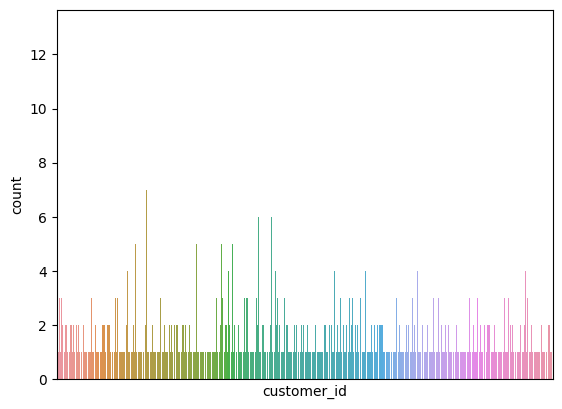

In [ ]:
sns.countplot(data=df,x='customer_id')
plt.xticks([]);

In [ ]:
#Top 10 Customers
df['customer_id'].value_counts().head(10)

52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
Name: customer_id, dtype: int64

Observation: Customers who placed only one order seems to be more. Lets calculate the number of customers with 1 order and 2 orders , with percentile.

In [ ]:
#Count of customers whose placed only one order, two orders or more orders
one_ordercount=((df['customer_id'].value_counts()) == 1).sum()
two_ordercount=((df['customer_id'].value_counts()) == 2).sum()
more_ordercount=((df['customer_id'].value_counts()) > 2).sum()
print('One Order:',one_ordercount,'Two Order:',two_ordercount,'Repeat Orders:',more_ordercount)


One Order: 784 Two Order: 267 Repeat Orders: 149


Observation: Customers who placed one order are 784,
2 orders are 267 and more than 2 orders are 149. Roughly 65% of customers have placed one order.

#### Analysis on Restaurant name

In [ ]:
df['restaurant_name'].nunique()

178

In [ ]:
#Finding which restaurant has many orders
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

Observation: There are 178 restaurants in the dataset. 'Shake Shack' seems to be most commonly ordered restaurant.

In [ ]:
df['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

####Analysis on cuisine_type

In [ ]:
df['cuisine_type'].nunique()

14

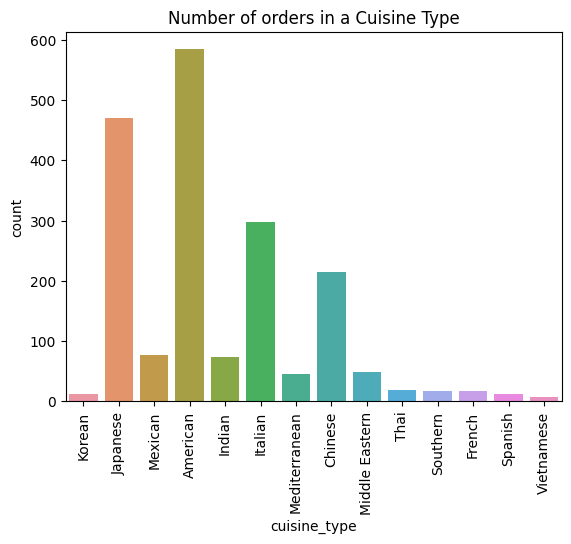

In [ ]:
#Countplot of Cuisine Type
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.title('Number of orders in a Cuisine Type');

In [ ]:
#Percentage distribution of Cuisine Type
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

Observation: There are 14 Cuisines served by the app. With reference to the plot, American(31%) and Japanese(25%) are most popular cuisine type.

####Analysis on Cost of the order

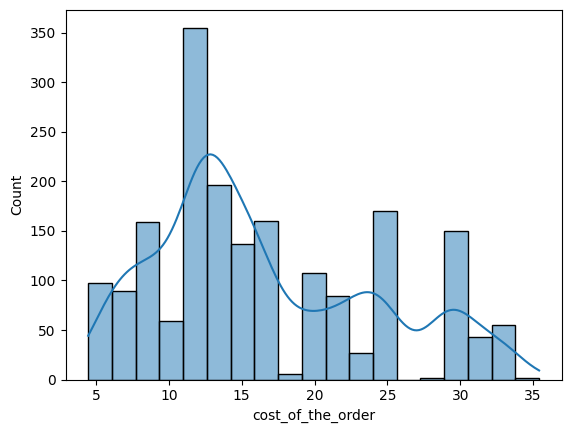

In [ ]:
#Since costoftheorder is a continuous/numerical value plotting histogram and box plots.
sns.histplot(data=df,x='cost_of_the_order',kde=True);

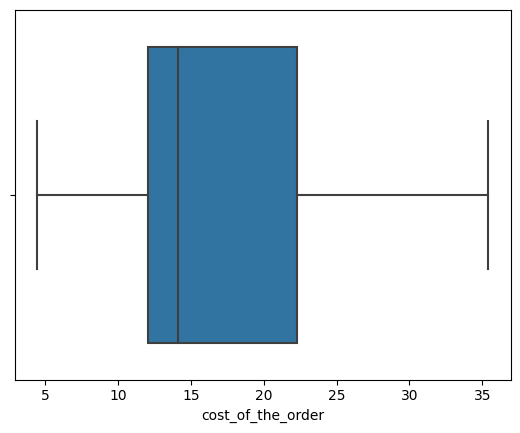

In [ ]:
#Box plot of cost of the order
sns.boxplot(data=df,x='cost_of_the_order');

Observations:
*   Histogram shows that maximum orders is place with 11 to 13.
*   In the boxplot there is no outliers meaning the cost of order is within the acceptable range(Lower and upper whiskers).
*   Median is somewhere around 14, 50% of orders placed have cost of order less than 14.
*   Cost of the order is little right skewed.


####Analysis of day_of_the_week

In [ ]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [ ]:
#Percentage of day of the week category.
df['day_of_the_week'].value_counts(normalize=True)

Weekend    0.711802
Weekday    0.288198
Name: day_of_the_week, dtype: float64

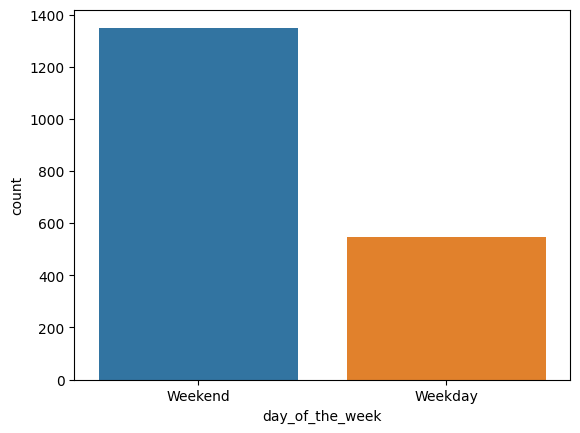

In [ ]:
#Countplot of day_of_the_week
sns.countplot(data=df,x='day_of_the_week');

Observations:

*   Clearly, from the countplot we can say that the number of orders placed in a weekend(75%) is more than the weekday(25%)




#### Analysis of Rating

In [ ]:
df['rating'].nunique()

4

In [ ]:
#Count of values in each category
df['rating'].value_counts(normalize=True)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

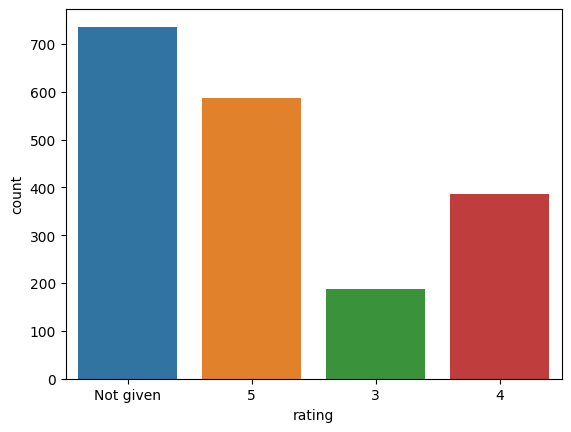

In [ ]:
#countplot for Rating column
sns.countplot(data=df,x='rating');

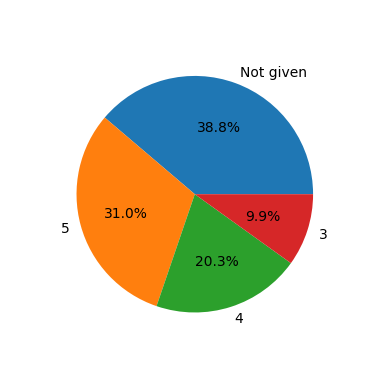

In [ ]:
# Pie chart
labels = ['Not given', '5', '4', '3']
plt.pie(df['rating'].value_counts(), autopct = '%.1f%%', radius = 0.8,
        labels = labels)
plt.show()

Observations:
*   Ratings is of 4 categories: 'Not Given', '5', '4', '3'.
*   From the plots, 38.8% of orders is of Not Given any rating, followed by 5 rated orders with 31%.



#### Analysis of food preparation time

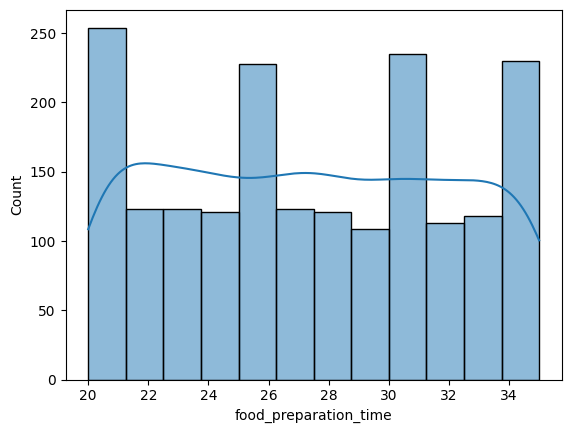

In [ ]:

#Since the food preparation time is numerical column, Plotting histogram and box plot.

sns.histplot(data=df,x='food_preparation_time',kde=True);

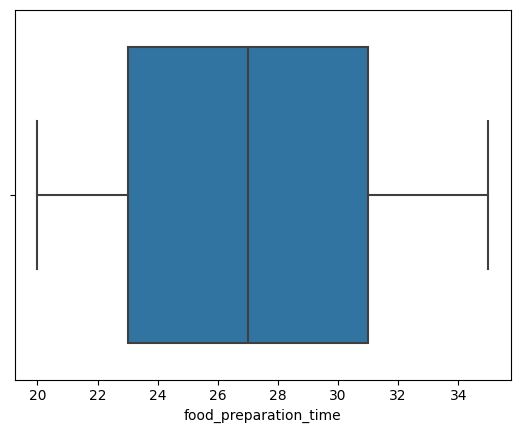

In [ ]:
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

In [ ]:
print(
    " Median:",
    df["food_preparation_time"].median(),
    "\n",
    "Mean:",
    df["food_preparation_time"].mean(),
    "\n",
    "Min:",
    df["food_preparation_time"].min(),
    "\n",
    "Max:",
    df["food_preparation_time"].max(),
)


 Median: 27.0 
 Mean: 27.371970495258168 
 Min: 20 
 Max: 35


Observations:
*   Food preparation time seems to be symmetrical with the median around 27 minutes.
*   Minimum food preparation time is 20 minutes and maximum food preparation time is 35 minutes.
*   No outliers found





####Analysis of delivery time

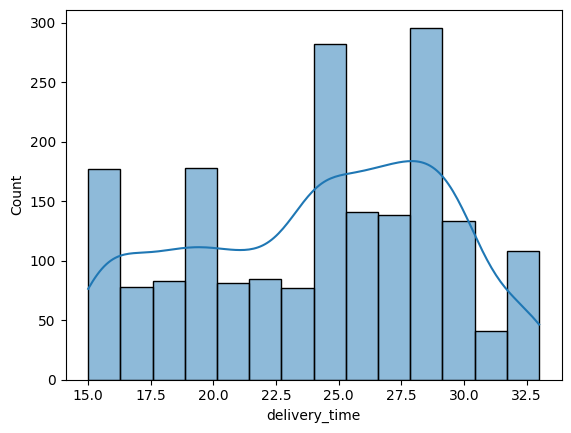

In [ ]:
sns.histplot(data=df,x='delivery_time',kde=True);

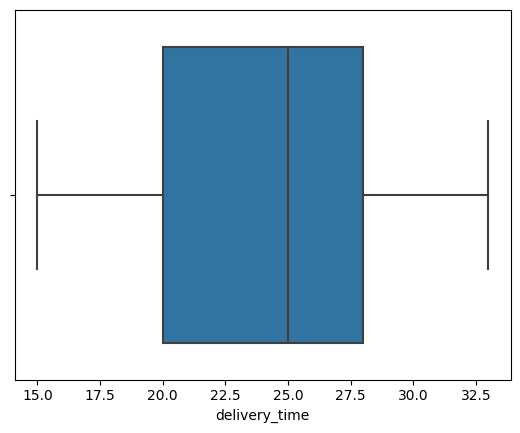

In [ ]:
sns.boxplot(data=df,x='delivery_time');

In [ ]:
print(
    " Median:",
    df["delivery_time"].median(),
    "\n",
    "Mean:",
    df["delivery_time"].mean(),
    "\n",
    "Min:",
    df["delivery_time"].min(),
    "\n",
    "Max:",
    df["delivery_time"].max(),
)


 Median: 25.0 
 Mean: 24.161749209694417 
 Min: 15 
 Max: 33


Observations:
*   The median is bigger than the mean value indicating that the delivery time is left skewed.
*   75% of orders are delivered within 28 minutes.
*   Minimum of 15 minutes and maximum of 33 minutes are taken for delivering food.





#### Total Time

Lets create a column that holds a combined time taken to deliver to a customer. Thats the time taken for the customer to get the order as they place an order with the app.

In [ ]:
df['total_time']=df['delivery_time']+df['food_preparation_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


#### Analysis on total_time

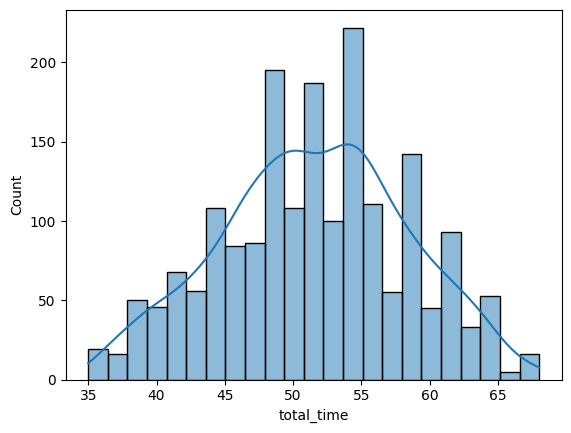

In [ ]:
sns.histplot(data=df, x='total_time',kde=True);

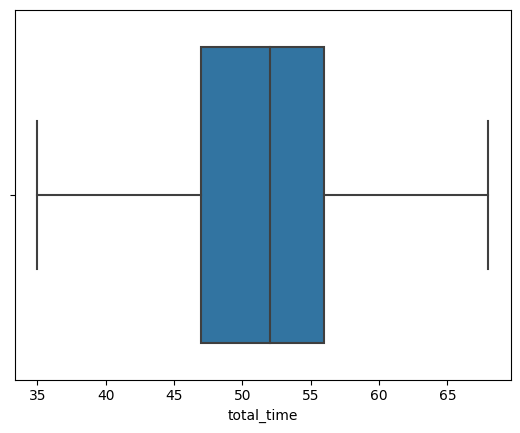

In [ ]:
sns.boxplot(data=df, x= 'total_time');

In [ ]:
print(
    " Median:",
    df["total_time"].median(),
    "\n",
    "Mean:",
    df["total_time"].mean(),
    "\n",
    "Min:",
    df["total_time"].min(),
    "\n",
    "Max:",
    df["total_time"].max(),
)


 Median: 52.0 
 Mean: 51.53371970495258 
 Min: 35 
 Max: 68


Observations:
*   Any order placed takes about minimum 35 minutes to maximum of 68 minutes to prepare and deliver.
*   More than 50% 0f the orders take more than 52 minutes.
*   No outliers are found





###  Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Top5 restaurants with number of orders
df['restaurant_name'].value_counts().head(5)



Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [ ]:
df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending=False)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: order_id, Length: 178, dtype: int64

#### Observations:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm are the top 5 restaurants.

###  Which is the most popular cuisine on weekends?

In [ ]:
# Popular cuisine type on weekends
weekenddata = df[df['day_of_the_week']== 'Weekend']
weekenddata['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
The most popular cuisine type on weekends is **American**


### What percentage of the orders cost more than 20 dollars?

In [ ]:
costmore20 = df[df['cost_of_the_order']>20]
percentage_cost20=round((costmore20.shape[0]/df.shape[0])*100,2)
print('Number of orders with more than 20 dollars are',costmore20.shape[0],'that is',percentage_cost20,'% of all the orders placed.')

Number of orders with more than 20 dollars are 555 that is 29.24 % of all the orders placed.


#### Observations:
Number of orders with more than 20 dollars are 555 that is 29.24 % of all the orders placed.


###  What is the mean order delivery time?

In [ ]:
# mean delivery time
print('The mean order delivery time is',round(df['delivery_time'].mean(),2),'minutes')

The mean order delivery time is 24.16 minutes


#### Observations:
The mean order delivery time is **24.16** minutes


### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# top 3 customers with more orders
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
Top 3 customers who placed maximum orders are 52832, 47440, 83287.


### Multivariate Analysis

###  Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


The numerical variables are
*  cost_of_the_order
*  food_preparation_time
*  delivery_time
*  total_time

The Categorical variables are
*  cuisine_type
*  day_of_the_week
*  rating

Lets start exploring the relationship between numerical vs numerical, numerical vs categorical variables.

#### Analysis on Food_Prepation_time vs cost_of_the_order vs delivery_time

<Axes: >

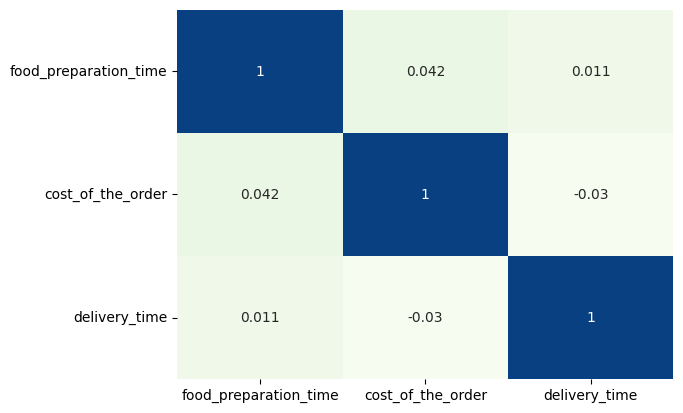

In [ ]:
numeric_cols=['food_preparation_time','cost_of_the_order','delivery_time']
sns.heatmap(data=df[numeric_cols].corr(),annot=True,cbar=False,cmap='GnBu')

Observation: There is no or very minimal corelation between food preparation time,cost of the order, delivery time.

###Cuisine Type

#### Analysis on cuisine type vs cost of the order

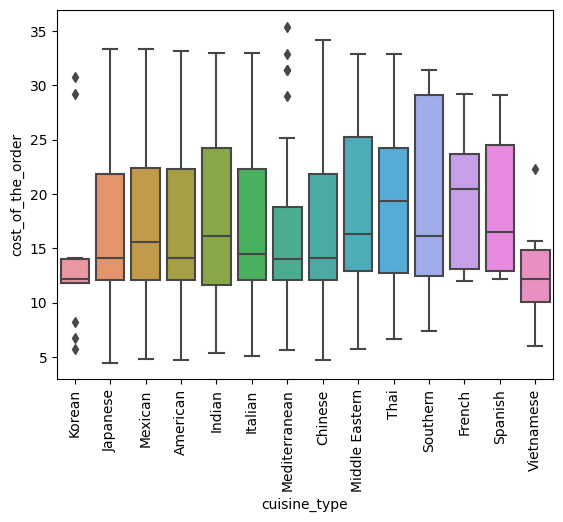

In [ ]:

sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#From the graph,Minimum order value for French and spanish is the highest, checking to see what is the starting cost of order for each cuisine.
df.groupby(['cuisine_type'])['cost_of_the_order'].min().sort_values(ascending=True)

cuisine_type
Japanese           4.47
American           4.71
Chinese            4.75
Mexican            4.85
Italian            5.05
Indian             5.34
Mediterranean      5.67
Korean             5.77
Middle Eastern     5.77
Vietnamese         6.01
Thai               6.69
Southern           7.38
French            11.98
Spanish           12.13
Name: cost_of_the_order, dtype: float64

In [ ]:
df.groupby(['cuisine_type'])['cost_of_the_order'].sum().sort_values(ascending=False)

cuisine_type
American          9530.78
Japanese          7663.13
Italian           4892.77
Chinese           3505.62
Mexican           1303.85
Indian            1235.14
Middle Eastern     922.21
Mediterranean      711.84
Thai               364.95
French             356.29
Southern           328.11
Spanish            227.93
Korean             182.02
Vietnamese          90.18
Name: cost_of_the_order, dtype: float64

Obersavations:

*   American cuisine has the highest revenue generated which is consistent with maximum orders from the cuisine but the minimum order value is lower for Japanese cuisine.
*   Korean, Mediterranean, Vietnamese have outliers meaning there is order with abnormally low cost (could be due to promotions) and very high cost orders(Maybe group order)
*  Minimum order value seems to be higher on the French and spanish cuisines.




#### Analysis on cuisine type vs food preparation time

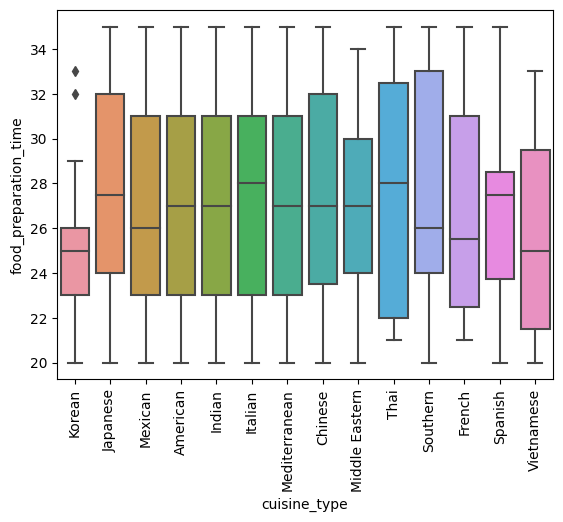

In [ ]:

sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_cuisinepreptime = pd.DataFrame(
    {
        "cuisine_type": np.sort(df["cuisine_type"].unique()),
        "minimum_food_prep_time": df.groupby("cuisine_type", as_index=False)[
            "food_preparation_time"
        ].min()["food_preparation_time"],
        "maximum_food_prep_time": df.groupby("cuisine_type", as_index=False)[
            "food_preparation_time"
        ].max()["food_preparation_time"],
        "median_food_prep_time": df.groupby("cuisine_type", as_index=False)[
            "food_preparation_time"
        ].median()["food_preparation_time"],
        "mean_food_prep_time": df.groupby("cuisine_type", as_index=False)[
            "food_preparation_time"
        ].mean()["food_preparation_time"],
    }
)
df_cuisinepreptime

,cuisine_type,minimum_food_prep_time,maximum_food_prep_time,median_food_prep_time,mean_food_prep_time
0,American,20,35,27.0,27.440068
1,Chinese,20,35,27.0,27.511628
2,French,21,35,25.5,26.888889
3,Indian,20,35,27.0,27.109589
4,Italian,20,35,28.0,27.483221
5,Japanese,20,35,27.5,27.510638
6,Korean,20,33,25.0,25.461538
7,Mediterranean,20,35,27.0,27.000000
8,Mexican,20,35,26.0,26.727273
9,Middle Eastern,20,34,27.0,26.673469


Observation: On an average all cuisines take around 26 minutes to prepare the food. Cuisine type does not change the food preparation time.

#### Analysis on cuisine type vs delivery time

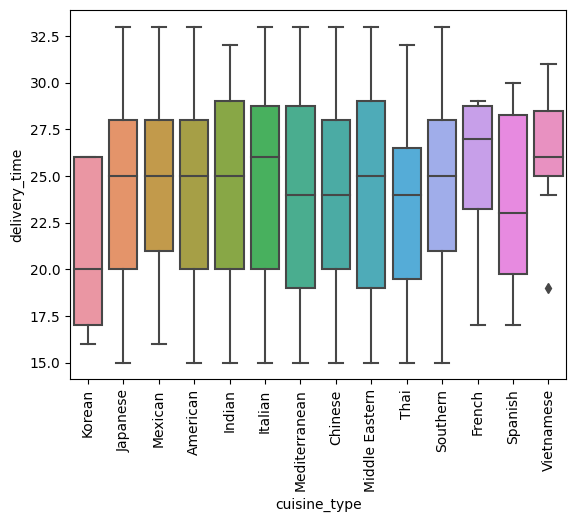

In [ ]:
sns.boxplot(data=df,x='cuisine_type',y='delivery_time')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_cuisinedeliverytime = pd.DataFrame(
    {
        "cuisine_type": np.sort(df["cuisine_type"].unique()),
        "number_of_orders": df.groupby(["cuisine_type"], as_index=False)["order_id"]
        .count()
        .sort_values(by="cuisine_type")["order_id"],
        "minimum_delivery_time": df.groupby("cuisine_type", as_index=False)[
            "delivery_time"
        ].min()
        .sort_values(by="cuisine_type")["delivery_time"],
        "maximum_delivery_time": df.groupby("cuisine_type", as_index=False)[
            "delivery_time"
        ].max()
        .sort_values(by="cuisine_type")["delivery_time"],
        "median_delivery_time": df.groupby("cuisine_type", as_index=False)[
            "delivery_time"
        ].median()
        .sort_values(by="cuisine_type")["delivery_time"],
        "mean_delivery_time": df.groupby("cuisine_type", as_index=False)[
            "delivery_time"
        ].mean()
        .sort_values(by="cuisine_type")["delivery_time"],
    }
)
df_cuisinedeliverytime


,cuisine_type,number_of_orders,minimum_delivery_time,maximum_delivery_time,median_delivery_time,mean_delivery_time
0,American,584,15,33,25.0,24.193493
1,Chinese,215,15,33,24.0,23.855814
2,French,18,17,29,27.0,25.333333
3,Indian,73,15,32,25.0,24.082192
4,Italian,298,15,33,26.0,24.567114
5,Japanese,470,15,33,25.0,24.131915
6,Korean,13,16,26,20.0,20.923077
7,Mediterranean,46,15,33,24.0,23.586957
8,Mexican,77,16,33,25.0,24.389610
9,Middle Eastern,49,15,33,25.0,24.081633


Observations:

*   Korean cuisine takes very little time to deliver(fastest)
*   On an average, Vietnamese and French take longer to deliver



###Restaurants

#### Analysis on top 10 restaurant

In [ ]:
#Top10 restaurants with higher revenue
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64

In [ ]:
#Top 10 restaurants with faster process time (based on average)
df.groupby(['restaurant_name'])['total_time'].mean().sort_values(ascending = True).head(10)

restaurant_name
Wo Hop Restaurant      38.0
Market Table           38.0
Galli Restaurant       38.0
Samurai Mama           39.0
DespaÌ±a               40.0
Gaia Italian Cafe      40.0
Hampton Chutney Co.    41.0
Lucky Strike           42.0
Lamarca Pasta          42.0
Socarrat Paella Bar    43.0
Name: total_time, dtype: float64

In [ ]:
#Top 10 restaurants with rating that is given
df_restaurants_rated=df[df['rating']!='Not given'].copy()
df_restaurants_rated['rating']=df_restaurants_rated['rating'].astype(int)
query_1=df_restaurants_rated.groupby(['restaurant_name','cuisine_type'],as_index=False)['rating'].mean().sort_values(by='restaurant_name')
query_1['number_of_order']=df_restaurants_rated.groupby(["restaurant_name","cuisine_type"], as_index=False)["order_id"].count().sort_values(by="restaurant_name")["order_id"]
query_1.sort_values(by=['number_of_order','rating'],ascending=False).head(10)

,restaurant_name,cuisine_type,rating,number_of_order
117,Shake Shack,American,4.278195,133
17,Blue Ribbon Sushi,Japanese,4.219178,73
133,The Meatball Shop,Italian,4.528571,70
16,Blue Ribbon Fried Chicken,American,4.328125,64
104,RedFarm Broadway,Chinese,4.243902,41
94,Parm,Italian,4.128205,39
105,RedFarm Hudson,Chinese,4.176471,34
125,TAO,Japanese,4.357143,28
106,Rubirosa,Italian,4.125000,24
57,Han Dynasty,Chinese,4.434783,23


####Analysis on Restaurant and Cuisine Type together

In [ ]:
query_2=df.groupby(["restaurant_name","cuisine_type"], as_index=False)["order_id"].count().sort_values(by="restaurant_name")
query_2

,restaurant_name,cuisine_type,order_id
0,'wichcraft,American,1
1,12 Chairs,Middle Eastern,4
2,5 Napkin Burger,American,5
3,67 Burger,American,1
4,Alidoro,American,1
...,...,...,...
174,Zero Otto Nove,Italian,2
175,brgr,American,2
176,da Umberto,Italian,3
177,ilili Restaurant,Middle Eastern,18


The above query gives 179 rows where as we only have 178 restaurants.Lets find out the duplicate.

In [ ]:
query_2[query_2['restaurant_name'].duplicated()==True]

,restaurant_name,cuisine_type,order_id
154,The Meatball Shop,Italian,112


In [ ]:
query_2[query_2['restaurant_name']=='The Meatball Shop']

,restaurant_name,cuisine_type,order_id
153,The Meatball Shop,American,20
154,The Meatball Shop,Italian,112


**Observation: The Meatball Shop is named under 2 Cuisine_Type. Not sure if they are 2 different restaurants with same name Or Same restaurants with wrongly entered cuisine type.**

#### Bottom 10 list of restaurants

In [ ]:
#Bottom 10 restaurants in terms of revenue
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).tail(10)

restaurant_name
Gaia Italian Cafe                8.78
Chola Eclectic Indian Cuisine    8.73
Woorijip                         8.25
'wichcraft                       8.10
La Follia                        8.05
Market Table                     6.79
Wa Jeal                          6.74
Cipriani Le Specialita           5.92
Big Wong Restaurant _¤¾Ñ¼       5.92
Hunan Manor                      5.72
Name: cost_of_the_order, dtype: float64

Observation: Here, need some inputs on how long these restaurants were on the app and that would tell us if its a fairly new restaurant then revenue being less.

In [ ]:
#Bottom 10 restaurants in terms of processing order time
df.groupby(['restaurant_name'])['total_time'].mean().sort_values(ascending = True).tail(10)

restaurant_name
Spice Thai                     59.00
Hot Kitchen                    59.50
Mira Sushi                     60.00
Grand Sichuan International    60.25
Crema Restaurante              61.00
Big Wong Restaurant _¤¾Ñ¼     62.00
Sushi Choshi                   62.00
Il Bambino                     63.00
Cipriani Le Specialita         65.00
Taro Sushi                     67.00
Name: total_time, dtype: float64

###Day of the week

####Analysis on day of week vs cost of order

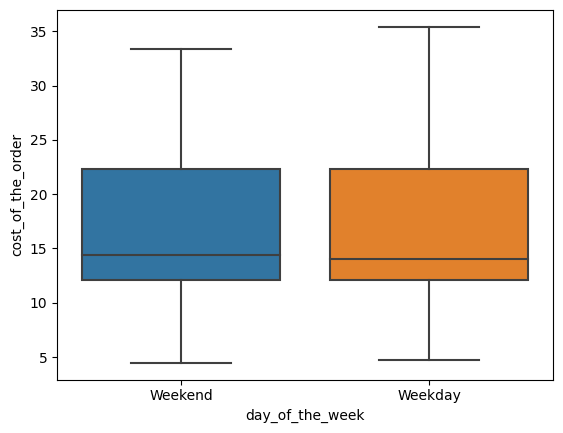

In [ ]:

sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order');

In [ ]:
df_day_cost = pd.DataFrame(
    {
        "day_of_week": np.sort(df["day_of_the_week"].unique()),
        "number_of_orders": df.groupby(["day_of_the_week"], as_index=False)["order_id"]
        .count()
        .sort_values(by="day_of_the_week")["order_id"],
        "minimum_cost": df.groupby("day_of_the_week", as_index=False)[
            "cost_of_the_order"
        ].min()["cost_of_the_order"],
        "maximum_cost": df.groupby("day_of_the_week", as_index=False)[
            "cost_of_the_order"
        ].max()["cost_of_the_order"],
        "median_cost": df.groupby("day_of_the_week", as_index=False)[
            "cost_of_the_order"
        ].median()["cost_of_the_order"],
        "mean_cost": df.groupby("day_of_the_week", as_index=False)[
            "cost_of_the_order"
        ].mean()["cost_of_the_order"],
    }
)
df_day_cost


,day_of_week,number_of_orders,minimum_cost,maximum_cost,median_cost,mean_cost
0,Weekday,547,4.75,35.41,14.07,16.311188
1,Weekend,1351,4.47,33.37,14.41,16.574833


Observations:


*  The average, minimum and maximum cost of order in Weekday or Weekend is the approximately same.
*  Cost of the order does not change with respect to day of the week.



####Analysis on day of week vs delivery time

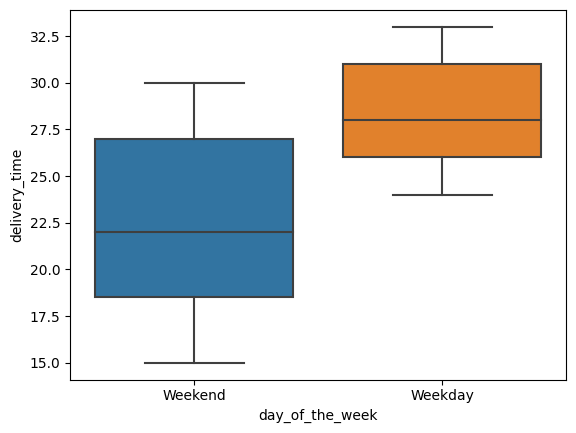

In [ ]:
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time');

In [ ]:
df_day_delivery = pd.DataFrame(
    {
        "day_of_week": np.sort(df["day_of_the_week"].unique()),
        "number_of_orders": df.groupby(["day_of_the_week"], as_index=False)["order_id"]
        .count()
        .sort_values(by="day_of_the_week")["order_id"],
        "minimum_delivery_time": df.groupby("day_of_the_week", as_index=False)[
            "delivery_time"
        ].min()["delivery_time"],
        "maximum_delivery_time": df.groupby("day_of_the_week", as_index=False)[
            "delivery_time"
        ].max()["delivery_time"],
        "median_delivery_time": df.groupby("day_of_the_week", as_index=False)[
            "delivery_time"
        ].median()["delivery_time"],
        "mean_delivery_time": df.groupby("day_of_the_week", as_index=False)[
            "delivery_time"
        ].mean()["delivery_time"],
    }
)
df_day_delivery

,day_of_week,number_of_orders,minimum_delivery_time,maximum_delivery_time,median_delivery_time,mean_delivery_time
0,Weekday,547,24,33,28.0,28.340037
1,Weekend,1351,15,30,22.0,22.470022


Observations:

*   More orders are delivered in the weekend and are quicker. Average delivery time on weekends is 22 minutes.
*   Weekdays take longer to deliver might be because of availability of delivery partners.



#### Analysis on day of week vs food prep time

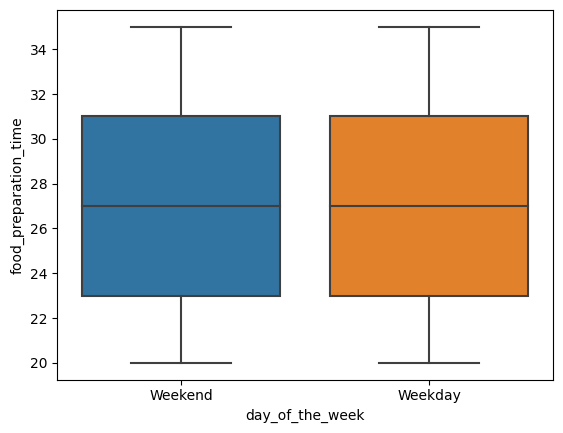

In [ ]:

sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time');

In [ ]:
df_day_prep = pd.DataFrame(
    {
        "day_of_week": np.sort(df["day_of_the_week"].unique()),
        "number_of_orders": df.groupby(["day_of_the_week"], as_index=False)["order_id"]
        .count()
        .sort_values(by="day_of_the_week")["order_id"],
        "minimum_food_preparation_time": df.groupby("day_of_the_week", as_index=False)[
            "food_preparation_time"
        ].min()["food_preparation_time"],
        "maximum_food_preparation_time": df.groupby("day_of_the_week", as_index=False)[
            "food_preparation_time"
        ].max()["food_preparation_time"],
        "median_food_preparation_time": df.groupby("day_of_the_week", as_index=False)[
            "food_preparation_time"
        ].median()["food_preparation_time"],
        "mean_food_preparation_time": df.groupby("day_of_the_week", as_index=False)[
            "food_preparation_time"
        ].mean()["food_preparation_time"],
    }
)
df_day_prep

,day_of_week,number_of_orders,minimum_food_preparation_time,maximum_food_preparation_time,median_food_preparation_time,mean_food_preparation_time
0,Weekday,547,20,35,27.0,27.212066
1,Weekend,1351,20,35,27.0,27.436714


Observation:
The food preparation time does not change based on the day of the week.

###Rating

#### Analysis on rating vs cost of order

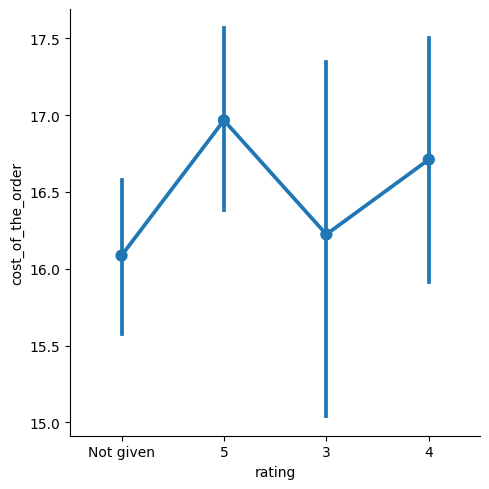

In [ ]:
sns.catplot(data=df,x='rating',y='cost_of_the_order',kind='point');

In [ ]:
df_rating_cost = pd.DataFrame(
    {
        "rating": np.sort(df["rating"].unique()),
        "number_of_orders": df.groupby(["rating"], as_index=False)["order_id"]
        .count()
        .sort_values(by="rating")["order_id"],
        "minimum_cost": df.groupby("rating", as_index=False)[
            "cost_of_the_order"
        ].min()["cost_of_the_order"],
        "maximum_cost": df.groupby("rating", as_index=False)[
            "cost_of_the_order"
        ].max()["cost_of_the_order"],
        "median_cost": df.groupby("rating", as_index=False)[
            "cost_of_the_order"
        ].median()["cost_of_the_order"],
        "mean_cost": df.groupby("rating", as_index=False)[
            "cost_of_the_order"
        ].mean()["cost_of_the_order"],
    }
)
df_rating_cost


,rating,number_of_orders,minimum_cost,maximum_cost,median_cost,mean_cost
0,3,188,4.75,33.37,14.120,16.223351
1,4,386,4.75,35.41,14.160,16.710337
2,5,588,4.47,33.03,15.205,16.965697
3,Not given,736,4.66,34.19,14.070,16.085340


Observation: Rating does not change with respect to the cost of order mostly in lower rating. Higher cost orders are well rated compared to the other categories.

####Analysis on rating vs delivery time

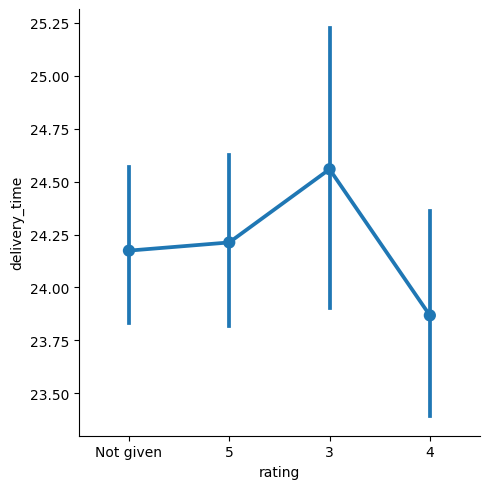

In [ ]:
sns.catplot(data=df,x='rating',y='delivery_time',kind='point');

Observation: If the delivery time is higher, the order is most likely to be rated low.

####Analysis on rating vs food prep time

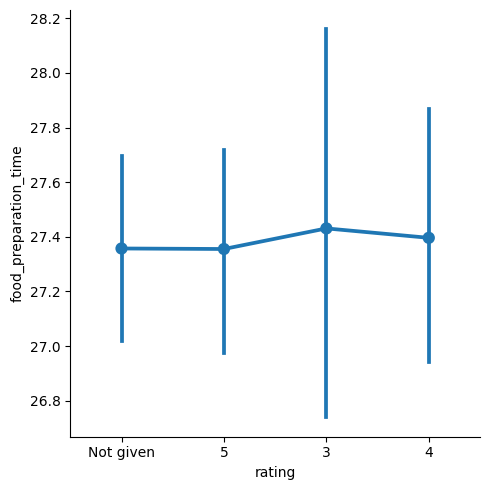

In [ ]:
sns.catplot(data=df,x='rating',y='food_preparation_time',kind='point');

Observations:
For low rated orders(3), the confidence interval is parallel to y axis. That means the preparation time does not affect the rating.

###Analysis on Cuisine Type and Ratings

####Analysis on total time vs cost vs day of week vs rating

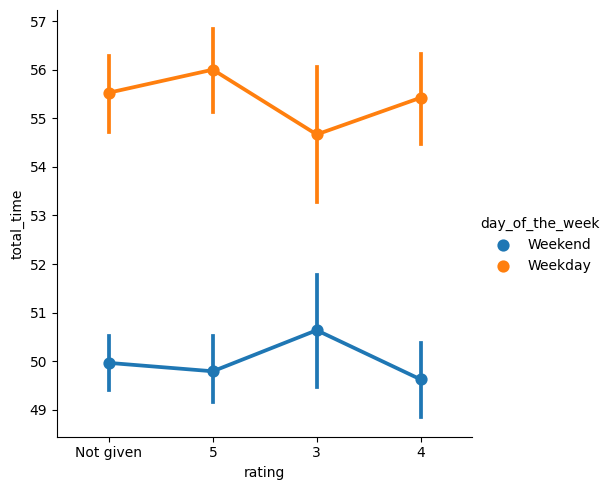

In [ ]:
sns.catplot(data=df,x='rating',y='total_time',hue='day_of_the_week',kind='point');

Observations:

Lower the total time, on a weekend the order is highly rated(4/5).The higher total time is most likely to be rated lower.

All the weekday orders take more time to process and time taken does not affect the rating.

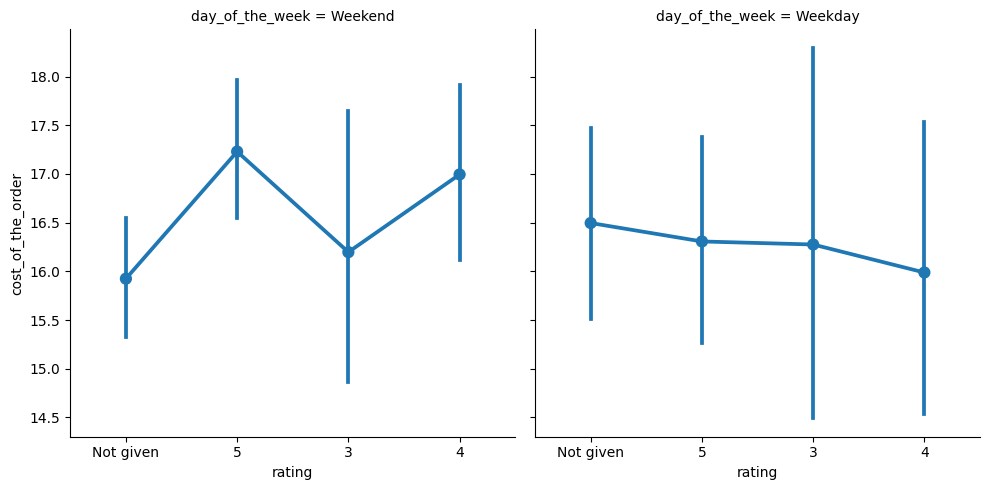

In [ ]:
sns.catplot(data=df,x='rating',y='cost_of_the_order',col='day_of_the_week',kind='point');

Observations:


*   Weekend: More the cost of order, more likely to be rated and is rated higher(4/5)
*   Weekday: Cost of the order doesnt affect the rating given.





####Analysis on Cost of order vs Cuisine type vs day of week

<Figure size 2500x700 with 0 Axes>

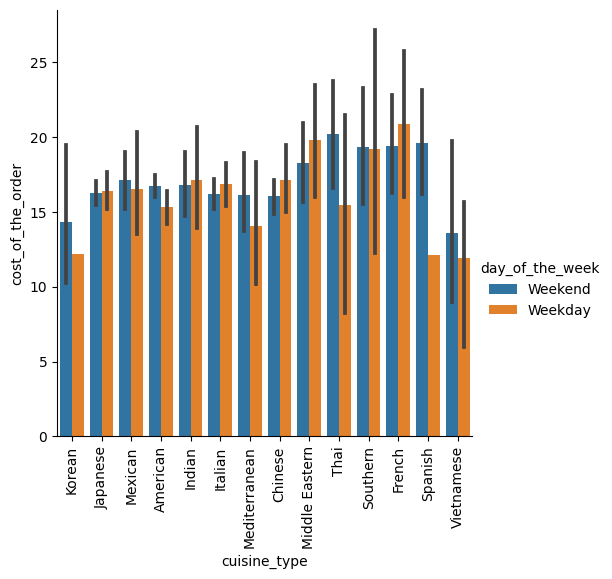

In [ ]:
plt.figure(figsize=(25, 7))
sns.catplot(data=df,x='cuisine_type',y='cost_of_the_order',hue='day_of_the_week',kind='bar')
plt.xticks(rotation=90)
plt.show()

Indian, Italian, Chinese, Middle Eastern, French are ordered more on weekdays with higher costs.

On Weekends, Thai, Korean, Spanish, Mediterranean and Vietnamese is prefered and dined for higher costs.

####Analysis on Total time vs Cuisine type vs day of week

<Figure size 2500x700 with 0 Axes>

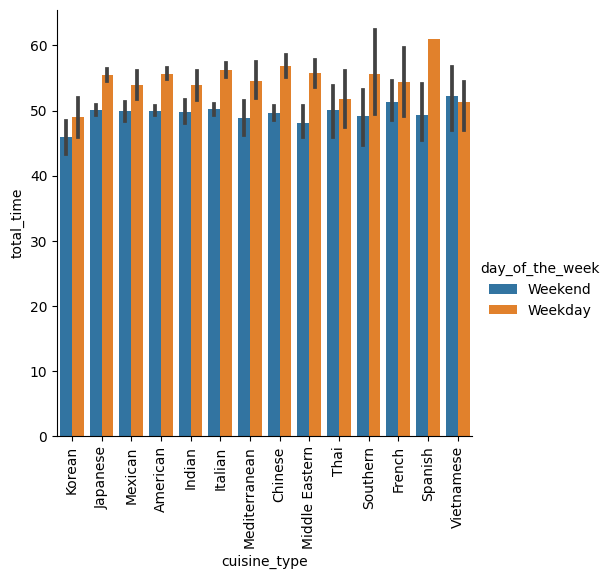

In [ ]:
plt.figure(figsize=(25, 7))
sns.catplot(data=df,x='cuisine_type',y='total_time',hue='day_of_the_week',kind='bar')
plt.xticks(rotation=90)
plt.show()

Total time taken to process orders is higher in weekdays not matter the cuisine type, which is consistent from all our above analysis.

####Analysis on Total time vs Cuisine type vs rating

<Figure size 2500x700 with 0 Axes>

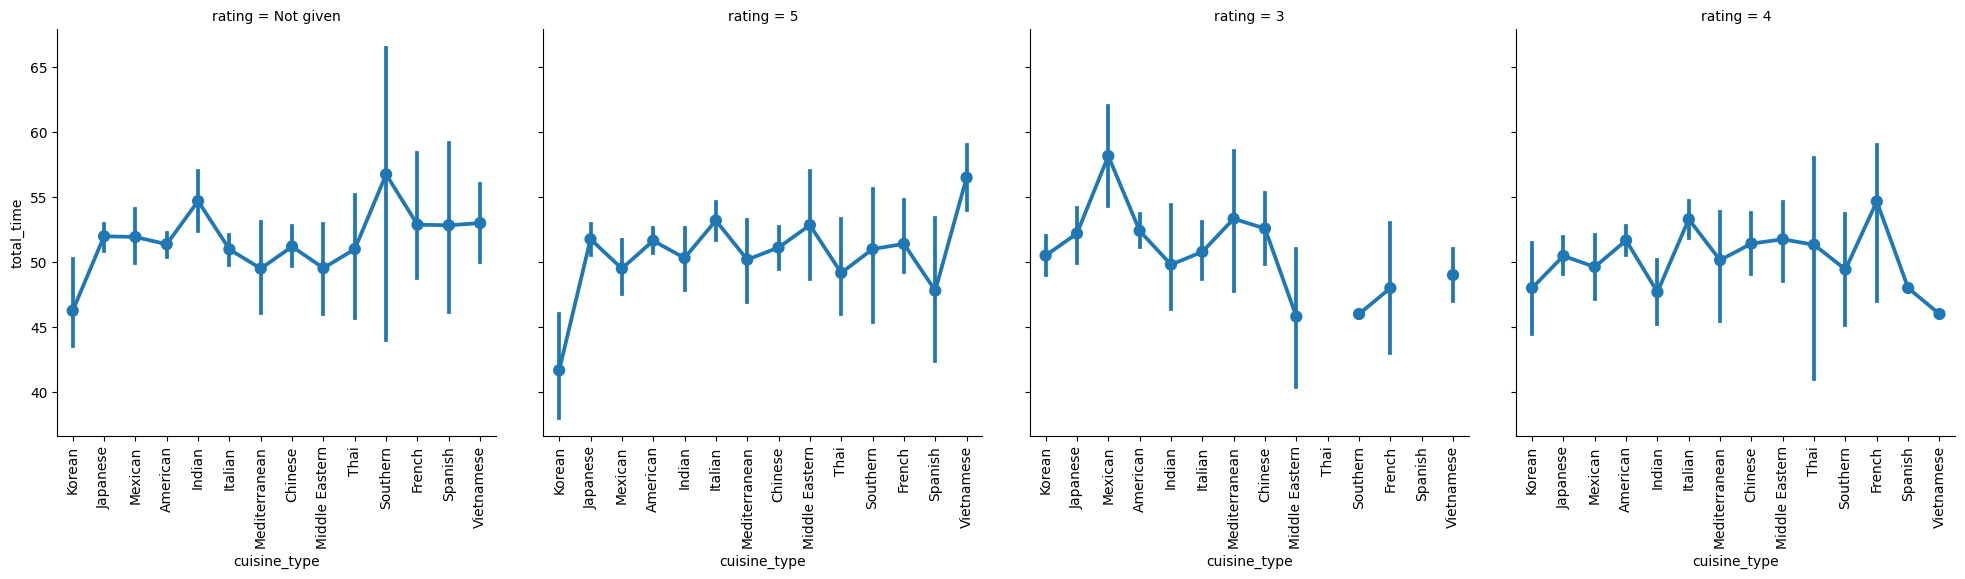

In [ ]:
plt.figure(figsize=(25, 7))
g=sns.catplot(data=df,x='cuisine_type',y='total_time',col='rating',kind='point')
g.set_xticklabels(rotation=90)
plt.show();

Observations:

*   Thai is most likely to be rated 4 no matter the total time taken.
*   Most of the Southern cuisine orders are not rated.
*   Korean with lower process time is rated higher.
*   There are no 3 rated order from Thai and Spanish cuisines.
*   More time taken to process for Mexican , lower the rating.







####Analysis on Cost of the order vs Cuisine type vs rating

<Figure size 2500x700 with 0 Axes>

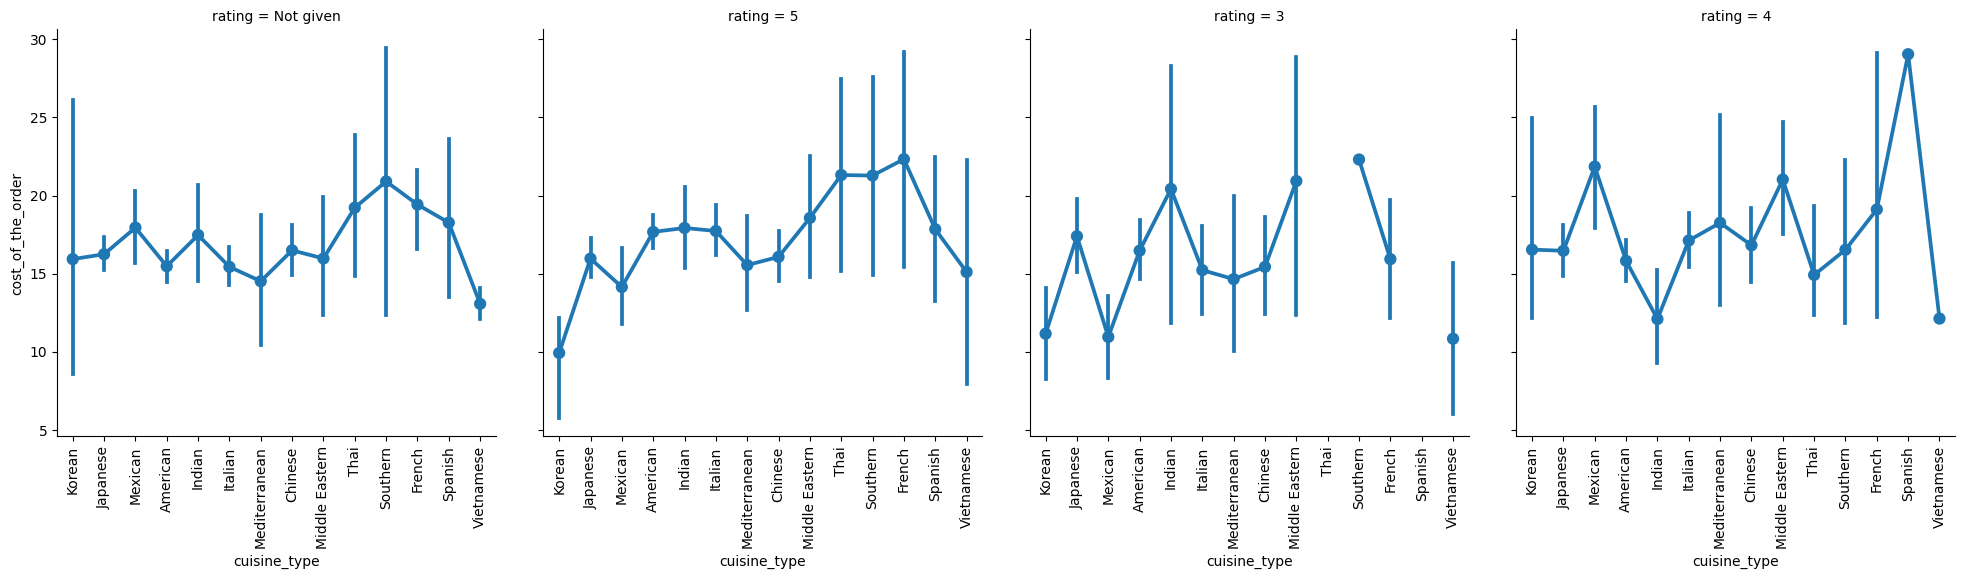

In [ ]:
plt.figure(figsize=(25, 7))
g=sns.catplot(data=df,x='cuisine_type',y='cost_of_the_order',col='rating',kind='point')
g.set_xticklabels(rotation=90)
plt.show();

Observations:

*   Thai and Spanish cuisines do not have any 3 ratings.
*   Indian and middle eastern are rated lower for a higher variance in price.
*   French cuisine is rated higher for higher cost orders
*   For all the cost range, there is fair amount of orders are not rated for Southern and Korean cuisine.





####Analysis on top 4 cuisines: American, Japanese, Italian ,Chinese

In [ ]:
df_top4Cuisine=df[(df['cuisine_type']=='American') | (df['cuisine_type']=='Japanese') | (df['cuisine_type']=='Italian') |(df['cuisine_type']=='Chinese')]
df_top4Cuisine.groupby(['cuisine_type','rating'],as_index=False)['cost_of_the_order'].mean()

,cuisine_type,rating,cost_of_the_order
0,American,3,16.475313
1,American,4,15.825000
2,American,5,17.675345
3,American,Not given,15.479630
4,Chinese,3,15.438750
5,Chinese,4,16.822750
6,Chinese,5,16.077826
7,Chinese,Not given,16.497683
8,Italian,3,15.229643
9,Italian,4,17.124259


In [ ]:
df_top4Cuisine.groupby(['cuisine_type','rating'],as_index=False)['total_time'].mean()

,cuisine_type,rating,total_time
0,American,3,52.406250
1,American,4,51.669231
2,American,5,51.643678
3,American,Not given,51.375000
4,Chinese,3,52.583333
5,Chinese,4,51.425000
6,Chinese,5,51.115942
7,Chinese,Not given,51.195122
8,Italian,3,50.785714
9,Italian,4,53.296296


In [ ]:
df_top4Cuisine.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1567.0,NaN,NaN,NaN,1477500.657307,548.916494,1476547.0,1477023.0,1477502.0,1477980.5,1478444.0
customer_id,1567.0,NaN,NaN,NaN,172183.786216,114525.070897,5139.0,77962.0,128711.0,275689.0,405334.0
restaurant_name,1567,116,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1567,4,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1567.0,NaN,NaN,NaN,16.332036,7.430548,4.47,12.08,14.12,21.93,34.19
day_of_the_week,1567,2,Weekend,1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1567,4,Not given,621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1567.0,NaN,NaN,NaN,27.47926,4.625784,20.0,23.0,27.0,31.0,35.0
delivery_time,1567.0,NaN,NaN,NaN,24.199745,4.964142,15.0,20.0,25.0,28.0,33.0
total_time,1567.0,NaN,NaN,NaN,51.679004,6.860754,35.0,47.0,52.0,56.0,68.0


Observations:
*   Cost of the order remains around 16 dollars on an average for any rating.
*   Rating is not affected by time taken to process the order.



###  The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Finding restaurants that have ratings more than 4
df_rating = df[df["rating"] != "Not given"].copy()
# df_rating.head()

# Converting to int type
df_rating["rating"] = df_rating["rating"].astype(int)
# Finding the restaurants with rating counts
df_rating_counts = (
    df_rating.groupby(["restaurant_name"], as_index=False)["rating"]
    .count()
    .sort_values(by="rating", ascending=False)
)
df_rating_counts.head()


,restaurant_name,rating
117,Shake Shack,133
132,The Meatball Shop,84
17,Blue Ribbon Sushi,73
16,Blue Ribbon Fried Chicken,64
104,RedFarm Broadway,41


In [ ]:
#Finding the restaurants with average rating
df_rating_avg=df_rating.groupby(['restaurant_name'],as_index=False)['rating'].mean()
df_rating_avg.head()

,restaurant_name,rating
0,'wichcraft,5.0
1,12 Chairs,4.5
2,5 Napkin Burger,4.0
3,67 Burger,5.0
4,Amma,4.5


In [ ]:
# Filtering data and merging together to find the restaurants with more than 50 rating count and avg rating more than 4
resultset = pd.merge(
    df_rating_counts[df_rating_counts["rating"] > 50],
    df_rating_avg[df_rating_avg["rating"] > 4],
    on="restaurant_name",
)
resultset


,restaurant_name,rating_x,rating_y
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125



#### Observations:
The following are the restaurants eligible for the promotional offer:

1 Shake Shack
2	The Meatball Shop
3	Blue Ribbon Sushi
4	Blue Ribbon Fried Chicken


### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
#Revenue generated by company
def revenue_order(cost):
  if cost > 20:
    return cost * 0.25
  elif cost > 5:
    return cost*0.15
  else:
    return cost*0


In [ ]:
df['revenue_company']=df['cost_of_the_order'].apply(revenue_order)
net_revenue_company= df['revenue_company'].sum()
print('The net revenue generated by FoodHub is',net_revenue_company,'dollars with',df.shape[0],'orders' )

The net revenue generated by FoodHub is 6166.303 dollars with 1898 orders


#### Observations:
The net revenue generated by FoodHub is 6166.303 dollars with 1898 orders



###  The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# We have column total_time with the values of time taken from when the user places the order to when the order gets delivered(sum of food prep time and delivery time)
df_totaltime_60=df[df['total_time']>60]
#df_totaltime_60
print(round((df_totaltime_60.shape[0]/df.shape[0])*100,2),'% is the percentage of orders taking more than 60 minutes')

10.54 % is the percentage of orders taking more than 60 minutes


#### Observations:
10.54 % is the percentage of orders taking more than 60 minutes


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Calculating the mean delivery time
mean_calculate=df.groupby(['day_of_the_week'])['delivery_time'].mean()
mean_calculate
print('The mean delivery time taken during Weekday is', round(mean_calculate[0],2),'minutes')
print('The mean delivery time taken during Weekend is', round(mean_calculate[1],2),'minutes')

The mean delivery time taken during Weekday is 28.34 minutes
The mean delivery time taken during Weekend is 22.47 minutes


#### Observations:
On an average, delivery takes 28 minutes on weekday and 22 minutes on weekend.


### Conclusion and Recommendations

### What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

### Conclusions:
In our app's customer base, we see intriguing patterns emerge from the data:

**Customer Behavior:**

* A noteworthy 12% of our customers are loyal repeat patrons, showcasing their commitment by placing more than 2 orders. On the other hand, a significant 65% of customers have opted for a single order experience.

**Culinary Preferences:**

* Our culinary offerings have struck a chord, with American, Japanese, Italian, and Chinese cuisines capturing a substantial 82.5% share of the orders. This speaks to our ability to cater to diverse tastes.

**Restaurant Excellence:**

* The cream of the crop emerges with Shake Shack, Blue Ribbon Sushi, and The Meatball Shop. These top three restaurants not only boast high order volumes but also maintain impressive average ratings and revenue generation.

**Temporal Insights:**

* The weekend rush is palpable, characterized by quicker delivery times at an average of 22 minutes. A remarkable 71% of orders are placed during these leisurely days.
Contrastingly, weekdays see a slower pace with deliveries taking around 28 minutes, and they contribute to 29% of our order volume.

**Customer Sentiment:**

* A substantial portion, roughly 38.7%, of the dataset lacks ratings. Addressing this could significantly impact the overall perception of our services. On the flip side, an encouraging 51% of orders receive high ratings (31% with a perfect 5 and 20% with a commendable 4), signifying a heartening level of customer satisfaction.

**Order Cost Distribution:**

* The cost distribution curve reveals intriguing insights about our pricing strategy. The majority of orders gravitate around the $12 to $14 range, indicating a sweet spot in pricing. Furthermore, the presence of a peak at $24 suggests a multi-modal pricing approach, reflecting the diverse preferences of our customer base.



### Recommendations:
Based on the conclusions drawn from the data, here are some targeted business recommendations to enhance Foodhub app's performance and customer satisfaction:

1. **Loyalty Programs for Repeat Customers:** Develop and promote a robust loyalty program that rewards repeat customers for their loyalty. Offer exclusive discounts, early access to new menu items, or special perks to incentivize them to continue placing orders through the app.
2. **Diversify Menu Offerings:** While American, Japanese, Italian, and Chinese cuisines are popular, consider periodically introducing new and trending cuisines to attract adventurous eaters and cater to a wider range of tastes. This can help maintain customer interest and encourage more frequent orders.
3. **Enhance Rating Collection:** Encourage customers to provide ratings and reviews for their orders by offering incentives such as discounts or small rewards. Increasing the number of rated orders will provide a more accurate reflection of customer satisfaction and help in improving service quality.
4. **Focus on Low-Rated Orders:** Identify the orders that received lower ratings and analyze the common issues reported by customers. Use this feedback to make targeted improvements, whether it's in food quality, delivery speed, or customer service.
5. **Optimize Weekday Operations:** Since weekdays see a lower order volume and slower delivery times, consider implementing strategies to streamline operations during these days. This could involve adjusting staffing levels, refining delivery routes, or offering special promotions to boost weekday orders.
6. **Weekend Delivery Consistency:** Maintain the quick delivery times during weekends, as this seems to be a strong point for customer satisfaction. Consider expanding delivery capacity or optimizing logistics to ensure timely deliveries even during peak weekend periods.
7. **Promote Highly Rated Restaurants:** Capitalize on the popularity of Shake Shack, Blue Ribbon Sushi, and The Meatball Shop by featuring them prominently in app promotions and marketing efforts. Highlight their strengths, such as average rating and unique offerings, to attract more orders.
8. **Dynamic Pricing Strategy:** Further explore the multi-modal pricing trend by introducing dynamic pricing for certain items or during specific times. This can help maximize revenue by adjusting prices based on demand while still maintaining the attractive pricing range for most orders.
9. **Customer Engagement and Feedback:** Establish clear channels for customer feedback and engagement. Regularly solicit suggestions, comments, and ideas from customers through surveys or social media. Use this feedback to continuously improve the app, menu, and overall service.
10. **Collaborations and Special Events:** Collaborate with local events, festivals, or influencers to create special promotions and events that attract attention and drive orders. These collaborations can introduce your app to new audiences and create a buzz around your offerings.

By implementing these recommendations, We can effectively capitalize on the strengths revealed by the data and address areas that require improvement. A data-driven approach will empower us to enhance customer satisfaction, attract more customers, and ultimately foster long-term business growth.




---